In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../CSV/Transformed House Price.csv')


<AxesSubplot: xlabel='Condition of the House'>

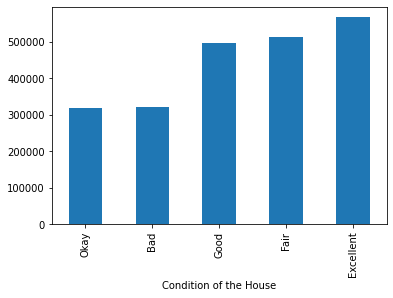

In [2]:
df.groupby('Condition of the House')[
    'Sale Price'].mean().sort_values().plot(kind="bar")


Renaming the Catogorical Variable  & Creating Dummy Variable

In [3]:
df = df.rename(columns={'Sale Price': 'Sale_Price'})
df = df.rename(columns={'Condition of the House': 'Condition_of_the_House'})
df = df.rename(columns={'Waterfront View': 'Waterfront_View'})
df = df.rename(columns={'Ever Renovated': 'Ever_Renovated'})


In [4]:
df = pd.get_dummies(df, columns=[
                    'Condition_of_the_House', 'Ever_Renovated', 'Waterfront_View'], drop_first=True)


Zipcode Dummy variable Using Binning

In [5]:
Zip_Table = df.groupby('Zipcode').agg(
    {'Sale_Price': 'mean'}).sort_values('Sale_Price', ascending=True)


In [6]:
Zip_Table['Zipcode_Group'] = pd.cut(Zip_Table['Sale_Price'], bins=10, labels=['Zipcode_Group_0', 'Zipcode_Group_1', 'Zipcode_Group_2', 'Zipcode_Group_3',
                                    'Zipcode_Group_4', 'Zipcode_Group_5', 'Zipcode_Group_6', 'Zipcode_Group_7', 'Zipcode_Group_8', 'Zipcode_Group_9'], include_lowest=True)
Zip_Table = Zip_Table.drop(columns='Sale_Price')
df = pd.merge(df, Zip_Table, left_on='Zipcode', how='left', right_index=True)
df = df.drop(columns='Zipcode')


In [7]:
df = pd.get_dummies(df, columns=['Zipcode_Group'], drop_first=True)


Drop "ID" Column

In [8]:
df.drop('ID',axis=1)

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900,3,1.00,1180,5650,1.0,0,7,1180,0,...,0,0,0,0,0,0,0,0,0,0
1,538000,3,2.25,2570,7242,2.0,0,7,2170,400,...,0,0,1,0,0,0,0,0,0,0
2,180000,2,1.00,770,10000,1.0,0,6,770,0,...,0,0,1,0,0,0,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,7,1050,910,...,0,0,0,1,0,0,0,0,0,0
4,510000,3,2.00,1680,8080,1.0,0,8,1680,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000,3,2.50,1530,1131,3.0,0,8,1530,0,...,0,0,0,1,0,0,0,0,0,0
21605,400000,4,2.50,2310,5813,2.0,0,8,2310,0,...,0,1,0,0,0,0,0,0,0,0
21606,402101,2,0.75,1020,1350,2.0,0,7,1020,0,...,0,0,0,1,0,0,0,0,0,0
21607,400000,3,2.50,1600,2388,2.0,0,8,1600,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
# df.to_csv("CSV/Transformed House Price2.csv",index=False)
